<a href="https://colab.research.google.com/github/Vixuz144/Admin-Prod/blob/main/AP_Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1.- Un fabricante necesita 40 000 circuitos impresos por año para la elaboración de cierto producto. El estima que el costo de orden es de \$20 por
pedido y que el costo de almacenamiento es del 20\% del valor promedio
del inventario. Si el costo unitario es de \$2, calcule:

a) la cantidad económica de orden

b) el costo del almacenamiento, el costo de orden y el costo total

c) el número de pedidos por año

In [ ]:
def lote1(Q, cu, co, cap):
  # Q = 40000
  # co = 20
  # cap = 0.2
  # cu = 2
  q = np.sqrt(2 * Q * co/(cu *cap))

  can_ped = Q/q

  cost_a = q / 2  * cu * cap
  cost_o = can_ped * co
  cost_t = cost_o + cost_a
  return q, can_ped, cost_a, cost_o, cost_t

In [ ]:
Q = 40000
co = 20
cap = 0.2
cu = 2
q, cant, a, o, cost = lote1(Q, cu, co, cap)

dec = 0
if dec == 0:
  print(round(q))
  print(round(cant))
  print(round(a), round(o), round(cost))
else:
  print(round(q, dec))
  print(round(cant, dec))
  print(round(a, dec), round(o, dec), round(cost, dec))

2000
20
400 400 800


2.- Los siguientes artículos han sido registrados en el fichero (kárdex) de una
compañía así como su costo anual de compra:

| No. | Código | Costo anual |
|-|-|-|
|1 |MO7 |\$ 32 000|
|2 |N14 |\$ 1 200|
|3 |M23 |\$ 37 000|
|4 |O26 |\$ 14 000|
|5 |P36 |\$ 108 000|
|6 |M37 |\$ 3 700|
|7 |N45 |\$ 28 000|
|8 |P53 |\$ 19 000|
|9 |077 |\$ 8 100|
|10 |P 84 |\$ 65 000|

Se desea que usted:

a) clasifique estos artículos según el método ABC;

b) indique el valor monetario y el porcentaje de cada clase;

c) calcule la cantidad económica por ordenar del artículo P36, cuyo costo unitario es de \$20, sabiendo que el costo de orden es de \$50 por pedido y el costo anual de almacenamiento es de \$5 por unidad.

In [ ]:
def met_ABC(data, a, b, c):
  data.sort(reverse = True)
  s = sum(data)
  x = np.array(data)
  p = x/s

  pa, tipo = [], []
  for i in range(len(p)):
    pr = sum(p[:i+1])
    pa.append(pr)
    if pr <= a:
      tipo.append('A')
    elif pr <= b:
      tipo.append('B')
    else:
      tipo.append('C')
  return x, p, pa, tipo

In [ ]:
def graf_ABC(data, prob_ac, tipo):
  c = []
  for i in range(len(tipo)):
    if tipo[i] == 'A':
      c.append('g')
    elif tipo[i] == 'B':
      c.append('orange')
    else:
      c.append('r')

  d = np.array(data) / 1000
  eje = d.astype(str)

  fig, ax = plt.subplots()
  ax.bar(eje, x, color = c)
  ax2 = ax.twinx()
  plt.ylim(0,1.05)
  ax2.plot(eje, prob_ac, 'o-' ,color = 'c')
  plt.show()

In [ ]:
def resumen_tipo(data, prob, tipo):
  sa, sb, sc = 0, 0, 0
  ma, mb, mc = 0, 0, 0
  pa, pb, pc = 0, 0, 0
  for i in range(len(tipo)):
    if tipo[i] == 'A':
      sa+=1
      ma+=data[i]
      pa+=prob[i]
    elif tipo[i] == 'B':
      sb+=1
      mb+=data[i]
      pb+=prob[i]
    else:
      sc+=1
      mc+=data[i]
      pc+=prob[i]

  ls = [sa/(sa+sb+sc), sb/(sa+sb+sc), sc/(sa+sb+sc)]
  lm = [ma, mb, mc]
  lp = [pa, pb, pc]

  r = [np.round(lm), np.round(ls,5), np.round(lp,5)]
  r = pd.DataFrame(np.transpose(r), index = ['A','B','C'], columns = ["Valor monetario", "Porcentaje", "Porcentaje monetario"])
  return r

    Costo Porcentaje Acumulado Clasificacion
0  108000    0.34177   0.34177             A
1   65000     0.2057   0.54747             A
2   37000    0.11709   0.66456             A
3   32000    0.10127   0.76582             A
4   28000    0.08861   0.85443             B
5   19000    0.06013   0.91456             B
6   14000     0.0443   0.95886             B
7    8100    0.02563   0.98449             C
8    3700    0.01171    0.9962             C
9    1200     0.0038       1.0             C 



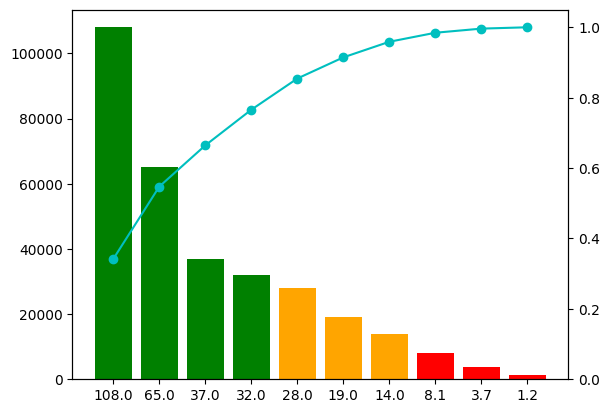

   Valor monetario  Porcentaje  Porcentaje monetario
A         242000.0         0.4               0.76582
B          61000.0         0.3               0.19304
C          13000.0         0.3               0.04114


In [ ]:
x = [32000, 1200, 37000, 14000, 108000, 3700, 28000, 19000, 8100, 65000]
x, p, a, tipo = met_ABC(x, 0.80, 0.96, 1.00)

t = [x,np.round(p, 5),np.round(a, 5),tipo]
t = pd.DataFrame(np.transpose(t), columns = ['Costo', 'Porcentaje', 'Acumulado', 'Clasificacion'])

print(t,'\n')

graf_ABC(x,a,tipo)

r = resumen_tipo(x,p,tipo)

print(r)


In [ ]:
def lote2(Q, co, ca):
  q = np.sqrt(2 * Q * co/ca)

  can_ped = Q/q

  cost_a = q / 2 * ca
  cost_o = can_ped * co
  cost_t = cost_o + cost_a
  return q, can_ped, cost_a, cost_o, cost_t

In [ ]:
cu = 20
Q = x[0] / cu
# print(Q)
co = 50
ca = 5
q = lote2(Q, co, ca)[0]
print(q, round(q))

328.63353450309967 329


3.- Una compañía desea establecer una regla de administración de inventarios para un producto cuyo consumo anual se eleva a aproximadamente \$250 000. Después de un estudio detallado de los principales registros contables, se ha colectado la siguiente información:

\begin{array}{lr}
\textrm{Consumo estimado para el año de 1981} & 105 000 \textrm{unidades}\\
\textrm{Costo unitario promedio} & \$2.50\\
\textrm{Alquiler del almacén} & \$0.25/\textrm{unidad}\\
\textrm{Costo de preparación de un pedido} & \$21.50/\textrm{pedido}\\
\textrm{Seguro de los inventarios} & 10\% \textrm{ de su valor}\\
\textrm{Costo promedio de recepción} & \$20/\textrm{pedido}\\
\textrm{Gastos postales} & \$0.50/\textrm{pedido}\\
\textrm{Pérdidas por deterioro} & 2\%\\
\textrm{Falta de ganancia en intereses} & 10\%
\end{array}

Calcule:

a) el costo de orden y almacenamiento;

b) la cantidad económica por ordenar para el año de 1981;

c) el costo de aprovisionamiento y de almacén;

d) la cantidad por ordenar, considerando la hipótesis de los siguientes descuentos por cantidad:

\begin{array}{l c}
1\textrm{ a }9 999 & \$2.50 \textrm{ por unidad}\\
10 000 \textrm{ a } 19 999 & \$2.40 \textrm{ por unidad}\\
20 000 \textrm{ o más} & \$2.35 \textrm{ por unidad}\\
\end{array}

In [ ]:
consumo_anual = 250000

Q = 105000

# Costo por unidad
cu = 2.5
alquiler = 0.25

#Costo por orden o pedido
preparacion_pedido = 21.5
recepcion = 0.20
postales = 0.5

#Porcentaje de valor de inventario
seguro_inventarios = 0.10

#Porcentajes
deterioro = 0.02
intereses = 0.10

In [ ]:
costo_almacenamiento_anual = consumo_anual*(intereses + seguro_inventarios + deterioro) + consumo_anual/cu * (alquiler)
coa = preparacion_pedido + recepcion + postales
costo_orden_anual = consumo_anual - costo_almacenamiento_anual

print(f'Costo anual de almacenamiento = {costo_almacenamiento_anual}')
print(f"Costo anual de aprovisionamiento (orden, pedido) = {costo_orden_anual}")

print(f'Cantidad de ordenes, pedido = {np.ceil(costo_orden_anual/coa)}')

Costo anual de almacenamiento = 80000.0
Costo anual de aprovisionamiento (orden, pedido) = 170000.0
Cantidad de ordenes, pedido = 7658.0


In [ ]:
Q = Q
cu = cu
ca = alquiler + cu*(seguro_inventarios + intereses + deterioro)
co = preparacion_pedido + recepcion + postales

print("Consumo estimado:",Q)
print("Costo unitario:",cu)
print("Costo de almacenamiento por unidad:", ca)
print("Costo por orden:", co, '\n')

q, cp, cal, cor, ct = lote2(Q, co, ca)
print("Lote económico:",round(q, 4))
print("Cantidad de pedidos al año:",np.ceil(cp))
print("Costo de almacenamiento anual:", round(cal, 2))
print("Costo de orden anual:", round(cor, 2))
print("Costo anual total:", round(ct, 2))



Consumo estimado: 105000
Costo unitario: 2.5
Costo de almacenamiento por unidad: 0.8
Costo por orden: 22.2 

Lote económico: 2414.0215
Cantidad de pedidos al año: 44.0
Costo de almacenamiento anual: 965.61
Costo de orden anual: 965.61
Costo anual total: 1931.22


4.- Usted debe proporcionar a sus clientes, todos los lunes, un promedio de de 400 unidades de cierto producto. Usted obtiene dicho producto de un fabricante a \$60 por unidad. El costo de orden y de transporte es de \$150 por pedido. El costo de almacenamiento se estima en un 20\% del costo de los productos almacenados. Hay 50 semanas de trabajo en el año. Usted desea elaborar una regla de administración de inventarios para determinar:

a) la cantidad económica por ordenar;

b) el costo total de aprovisionamiento y almacenamiento;

c) el punto de reorden y el nivel máximo del inventario, teniendo en cuenta que usted desea mantener 5 unidades como inventario de seguridad y que la demora promedio de la entrega es de una semana.

In [ ]:
def reorden(consumo_diario, demora, inventario_seguridad = 0):
  return consumo_diario * demora + inventario_seguridad

In [ ]:
consumo = 400
semanas = 50
Q = consumo*semanas
cu = 60
co = 150
cap = 0.2
q, n, caa, coa, ct = lote1(Q, cu, co, cap)

print("Lote económico:",round(q, 4))
print("Cantidad de pedidos al año:",np.ceil(n))
print("Costo de almacenamiento anual:", round(caa, 2))
print("Costo de orden anual:", round(coa, 2))
print("Costo anual total:", round(ct, 2))

demora = 7

print('Punto de reorden',reorden(400/7, 7, 5))

Lote económico: 707.1068
Cantidad de pedidos al año: 29.0
Costo de almacenamiento anual: 4242.64
Costo de orden anual: 4242.64
Costo anual total: 8485.28
Punto de reorden 405.0
